### Importing the required libraries

In [13]:
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

### Printing the built in datasets

In [54]:
print(sb.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'tips', 'titanic']


### Loading a dataset from seaborn

In [9]:
df1 = sb.load_dataset("flights")
df1.info()
df1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


### Plotting using matplotlib

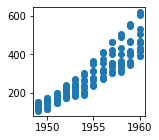

In [10]:
plt.figure(figsize=(2,2))
plt.scatter(df1['year'],df1['passengers'])
plt.show()

### Relplot()
##### Ploting a line graph using with month as the third parameter. hue let's you to plot multiple values in same graph

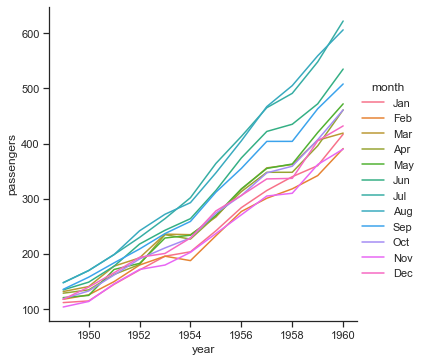

In [57]:
sb.relplot(x="year",y="passengers",data=df1,kind="line",hue="month")

##### Ploting a line graph using with month as the third parameter. 'month' let's you to plot values in different graph

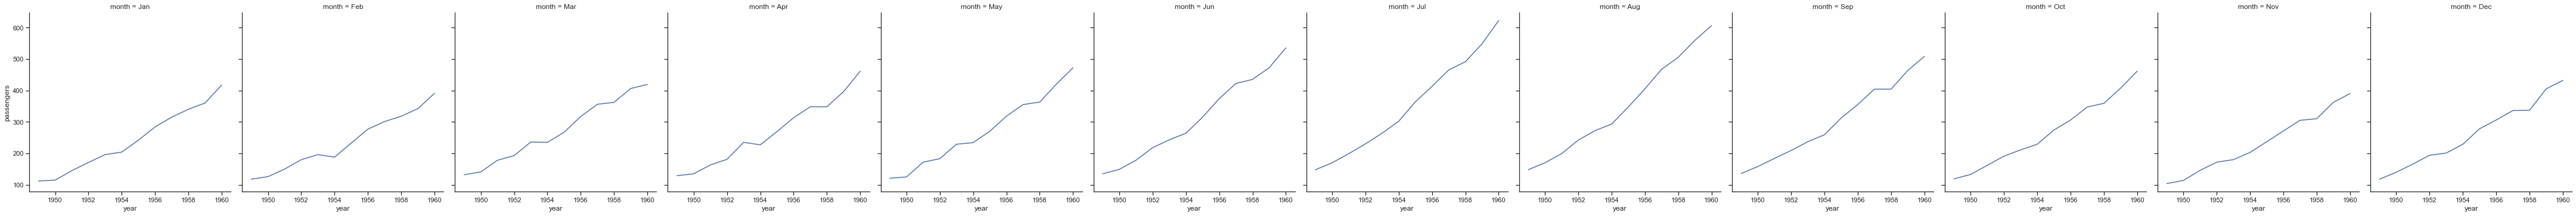

In [56]:
sb.relplot(x="year",y="passengers",data=df1,kind="line",col="month")

### Plotting a 2d numpy array as heatmap grap

[[0 2 2 3 1]
 [3 2 3 3 0]]


<AxesSubplot:>

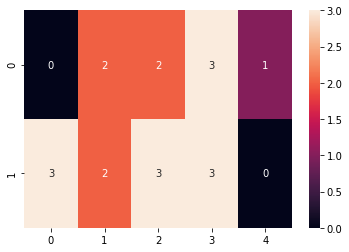

In [14]:
df2 = np.random.randint(5,size=(2,5)) 
print(df2)
sb.heatmap(df2,annot=True)

### Load a different dataset

In [58]:
tips = sb.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Relplot()
###### By default, relplot uses scatterplot

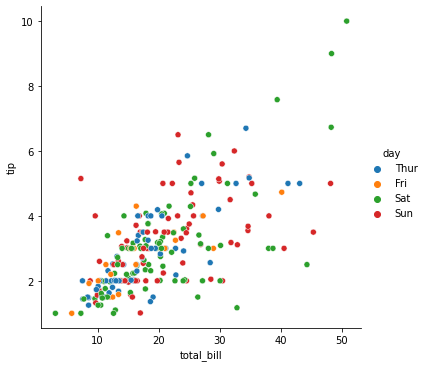

In [17]:
sb.relplot(data=tips, x="total_bill", y="tip", hue="day")

##### Using hue and col attribute in same relplot function

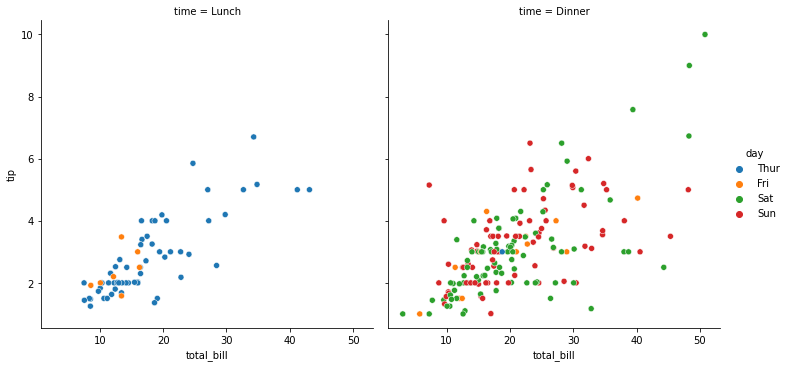

In [19]:
sb.relplot(data=tips, x="total_bill", y="tip", hue="day", col="time")

##### Using row attribute in relplot() function

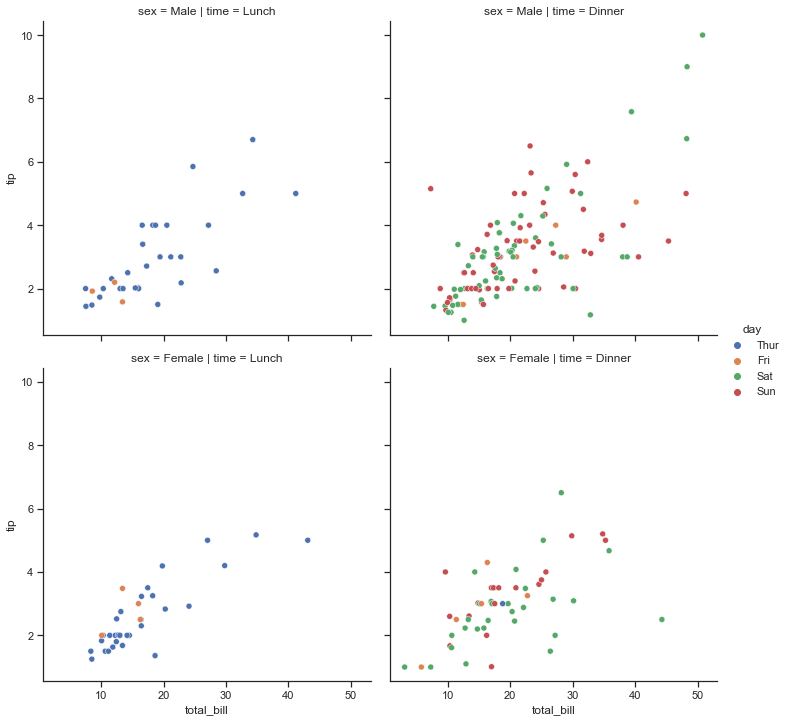

In [59]:
sb.relplot(data=tips, x="total_bill", y="tip", hue="day", col="time", row="sex")

##### Using col_wrap in relplot()

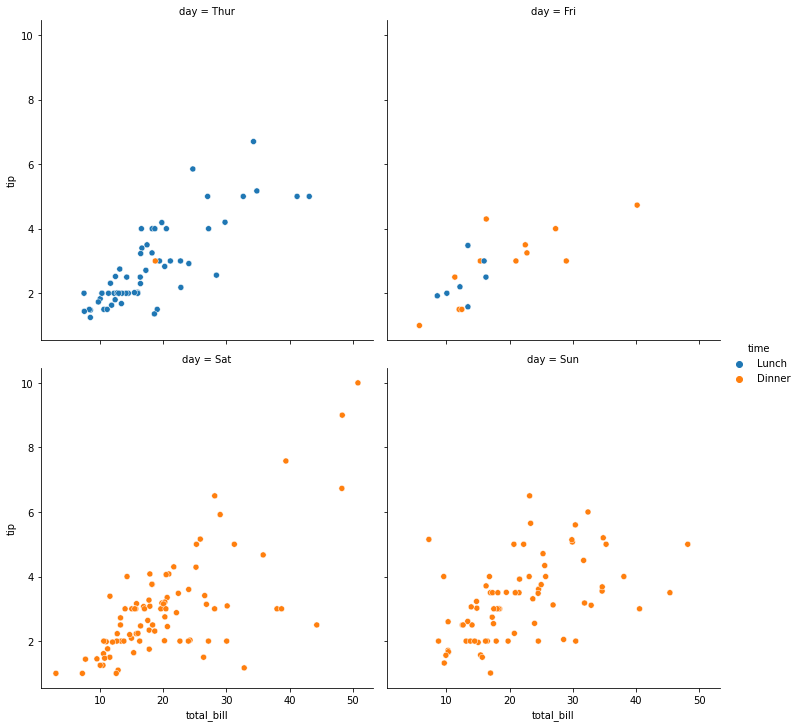

In [21]:
sb.relplot(data=tips, x="total_bill", y="tip", hue="time", col="day", col_wrap=2)

### Catplot() function.
##### There are a number of axes-level functions for plotting categorical data in different ways and a figure-level interface, catplot(), that gives unified higher-level access to them.

##### By default, catplot() also plots scatterplot graph

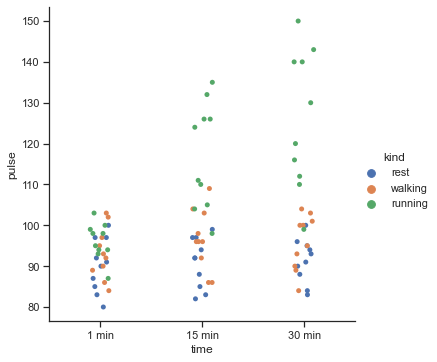

In [22]:
sb.set_theme(style="ticks")
exercise = sb.load_dataset("exercise")
g = sb.catplot(x="time", y="pulse", hue="kind", data=exercise)

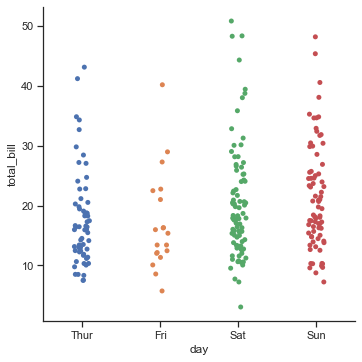

In [62]:
tips = sb.load_dataset("tips")
sb.catplot(x="day", y="total_bill", data=tips)

##### Swarm is a subset of scatterplot grap, which can be accessed using catplot()
##### The second approach adjusts the points along the categorical axis using an algorithm that prevents them from overlapping. It can give a better representation of the distribution of observations, although it only works well for relatively small datasets. This kind of plot is sometimes called a “beeswarm” and is drawn in seaborn by swarmplot(), which is activated by setting kind="swarm" in catplot():

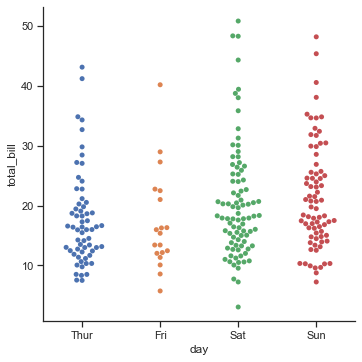

In [30]:
sb.catplot(x="day", y="total_bill", kind="swarm", data=tips)

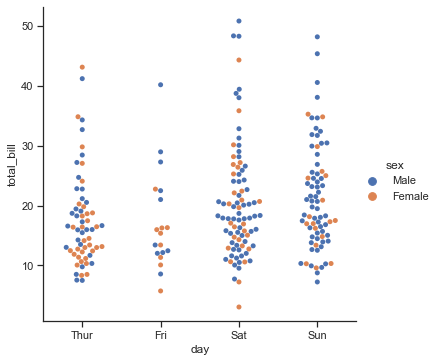

In [31]:
sb.catplot(x="day", y="total_bill", hue="sex", kind="swarm", data=tips)

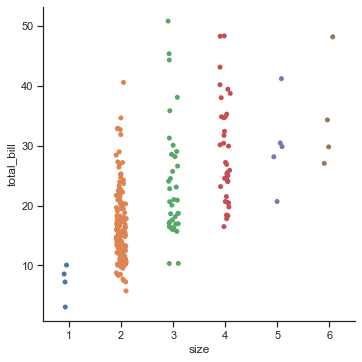

In [32]:
sb.catplot(x="size", y="total_bill", data=tips)

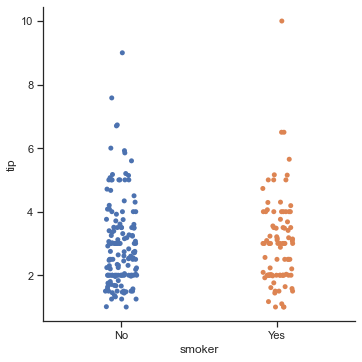

In [33]:
sb.catplot(x="smoker", y="tip", order=["No", "Yes"], data=tips)

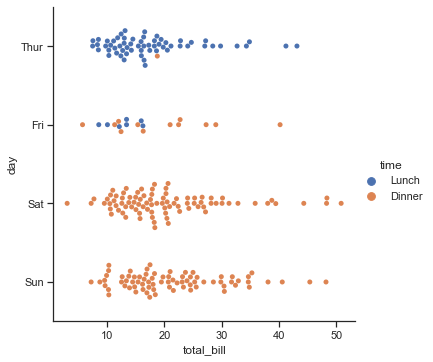

In [34]:
sb.catplot(x="total_bill", y="day", hue="time", kind="swarm", data=tips)

##### Box is a subset of distribution plot grap, which can be accessed using catplot()
##### Box Plot is the visual representation of the depicting groups of numerical data through their quartiles.

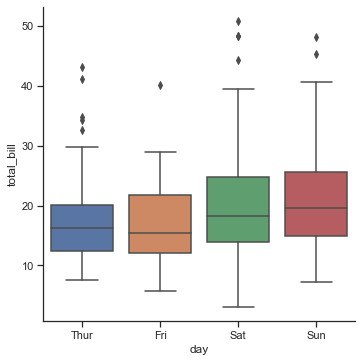

In [36]:
sb.catplot(x="day", y="total_bill", kind="box", data=tips)

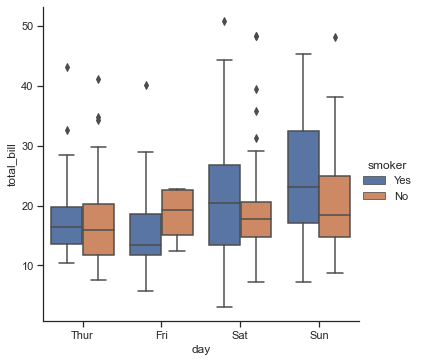

In [37]:
sb.catplot(x="day", y="total_bill", hue="smoker", kind="box", data=tips)

##### Bar plot is a subset of estimate plot grap, which can be accessed using catplot()
##### A familiar style of plot that accomplishes this goal is a bar plot. In seaborn, the barplot() function operates on a full dataset and applies a function to obtain the estimate (taking the mean by default). When there are multiple observations in each category, it also uses bootstrapping to compute a confidence interval around the estimate, which is plotted using error bars.

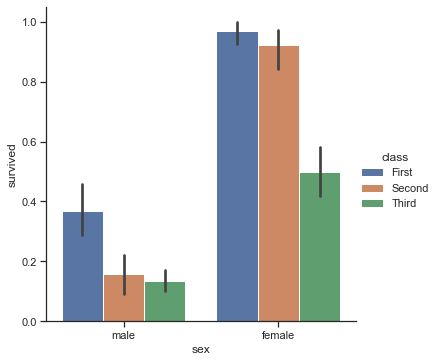

In [38]:
titanic = sb.load_dataset("titanic")
sb.catplot(x="sex", y="survived", hue="class", kind="bar", data=titanic)

##### Point plot is a subset of estimate plot grap, which can be accessed using catplot()
##### An alternative style for visualizing the same information is offered by the pointplot() function. This function also encodes the value of the estimate with height on the other axis, but rather than showing a full bar, it plots the point estimate and confidence interval.

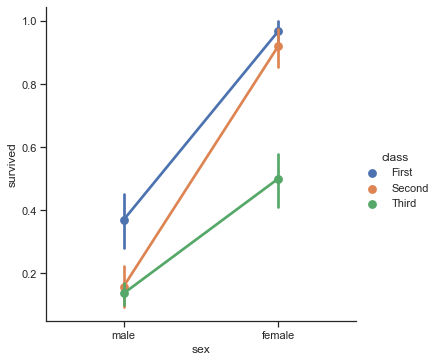

In [39]:
sb.catplot(x="sex", y="survived", hue="class", kind="point", data=titanic)

##### Swarnplot again!

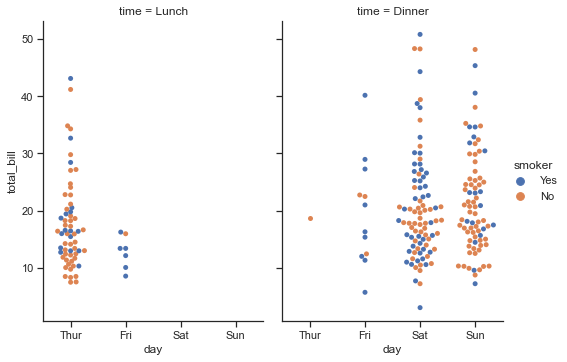

In [41]:
sb.catplot(x="day", y="total_bill", hue="smoker",col="time",aspect=.7,kind="swarm", data=tips)

### Visualizing distributions of data
##### One example of a situation where defaults fail is when the variable takes a relatively small number of integer values. In that case, the default bin width may be too small, creating awkward gaps in the distribution:

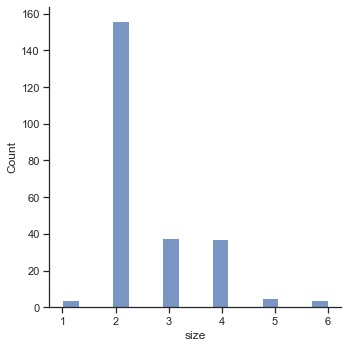

In [42]:
tips = sb.load_dataset("tips")
sb.displot(tips, x="size")

##### One approach would be to specify the precise bin breaks by passing an array to bins:

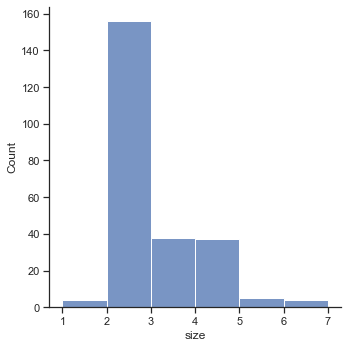

In [43]:
sb.displot(tips, x="size", bins=[1, 2, 3, 4, 5, 6, 7])

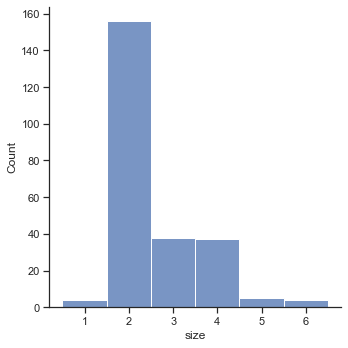

In [44]:
sb.displot(tips, x="size", discrete=True)

##### This can also be accomplished by setting discrete=True, which chooses bin breaks that represent the unique values in a dataset with bars that are centered on their corresponding value.

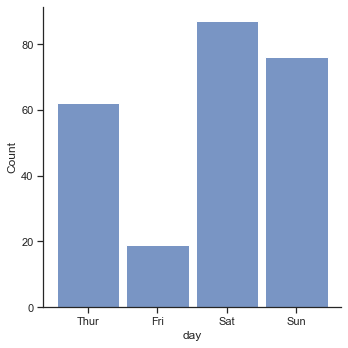

In [45]:
sb.displot(tips, x="day", shrink=.90)

### Conditioning on other variables
##### Once you understand the distribution of a variable, the next step is often to ask whether features of that distribution differ across other variables in the dataset.

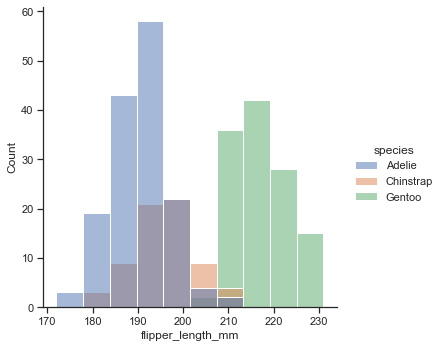

In [48]:
penguins = sb.load_dataset("penguins")
sb.displot(penguins, x="flipper_length_mm", hue="species")

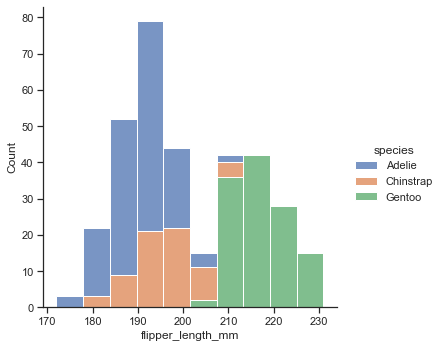

In [49]:
sb.displot(penguins, x="flipper_length_mm", hue="species", multiple="stack")

### Visualizing bivariate distributions
##### All of the examples so far have considered univariate distributions: distributions of a single variable, perhaps conditional on a second variable assigned to hue. Assigning a second variable to y, however, will plot a bivariate distribution:

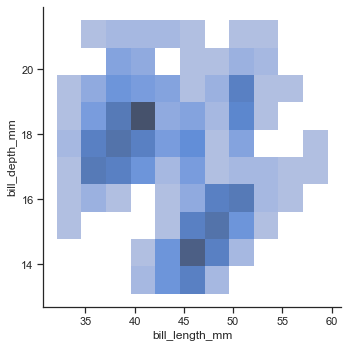

In [50]:
sb.displot(penguins, x="bill_length_mm", y="bill_depth_mm")

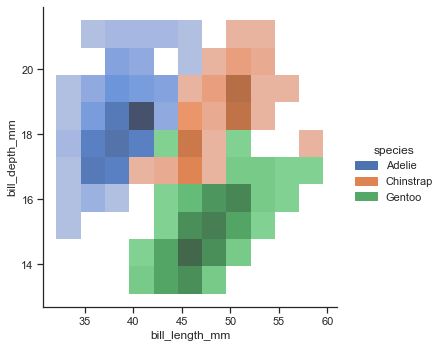

In [52]:
sb.displot(penguins, x="bill_length_mm", y="bill_depth_mm", hue="species")